In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import os
import pickle
import scipy.io as sio
import ieeg_funcs as ief
import dgFuncs as dg
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
for a in range(10,-1,-1):
    print(a)

10
9
8
7
6
5
4
3
2
1
0


In [5]:
# Get key directories
dir_dict=ief.get_path_dict()
# print(dir_dict.keys())
ftrs_root=dir_dict['ftrs_root']
# print(ftrs_root)
meta_dir=dir_dict['eu_meta']

In [6]:
# Get list of training and validation files
sub='1096'
split_fname=os.path.join(meta_dir,'data_splits_FR_'+sub+'.pkl')
print('Loading %s' % split_fname)
split_dict=pickle.load(open(split_fname,'rb'))
print(split_dict.keys())
test_files=split_dict['test_files']
train_files=split_dict['train_files']
train_szr_files=split_dict['train_szr_files']
valid_files=split_dict['valid_files']
n_train_file=len(train_files)
n_train_szr_file=len(train_szr_files)
print('%d training files (%d contain szrs)' % (n_train_file, n_train_szr_file))
n_valid_file=len(valid_files)
print('%d validation files' % n_valid_file)

Loading /Users/davidgroppe/Dropbox/TWH_INFO/EU_METADATA/data_splits_FR_1096.pkl
dict_keys(['valid_szr_files', 'train_files', 'train_szr_files', 'test_files', 'test_szr_files', 'valid_files'])
101 training files (22 contain szrs)
21 validation files


In [7]:
train_szr_files[0]

'109600102_0001'

# of extra szr windows=39
That is 3.900000 seconds 


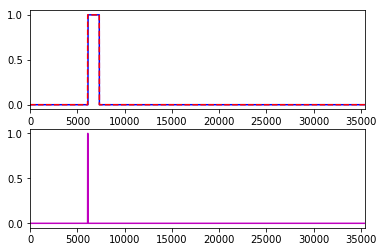

In [57]:
infname=train_szr_files[21]
orig_dict=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/EU_SZR_CLASS/1096_ORIG/'+infname+'_szr_class.npz')
neo_dict=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/EU_SZR_CLASS/1096/'+infname+'_szr_class.npz')

orig_class=orig_dict['szr_class']
neo_class=neo_dict['szr_class']
# xlim=[5000, 5800]
xlim=[0, len(orig_class)]
plt.figure(1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(orig_class,'b')
plt.plot(neo_class,'r--');
plt.xlim(xlim)

plt.subplot(2,1,2)
plt.plot(neo_class-orig_class,'m')
plt.xlim(xlim)

n_dif=np.sum(neo_class-orig_class)
print('# of extra szr windows=%d' % n_dif)
print('That is %f seconds ' % (n_dif/10))